# Evaluating Model Performance

**Notebook by: Emmanuel Contreras-Campana, Ph.D.**

In this notebook, we center our attention to evaluating our various models in a more systematic fashion. An important idea to keep in mind is choosing a model that furthers the companies objective. We would like to help lenders understand which fashion items they should make available to others. 

Two metrics worth considering are Precision and Recall. The higher the precision the lower the number of false positives (i.e. classes of no interest but were predicted to be of interest). While the higher the recall the smaller the chances an item of interest is predicted to be of no interest.

We prefer the recall value to be as high as possible for the high and moderate performing inventory because we would like to find as many of them as possible. Those are the fashion items that have the potential to bring in more revenue for both the lender and client company. Unfortunately, the higher the recall the lower the precision will be. For our case, we do not necessarily need precision to be all that high for the high and moderate performing inventory. The consequences of this will mean having more unwanted fashion items in the peer-2-peer rental community but the company will not actuallly incur any monetary loss only potential loss.

## Load Libraries

In [2]:
# Import common python library
from collections import OrderedDict

# Import numpy library
import numpy as np

# Import matplotlib library
import matplotlib.pyplot as plt

#from matplotlib.pyplot import *
from matplotlib import colors

# Import pandas library
import pandas as pd

# Import scikit-learn library
from sklearn.externals import joblib

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.metrics import precision_recall_curve

# Import imbalance-learn library
from imblearn.pipeline import make_pipeline

from imblearn.over_sampling import RandomOverSampler

# Import user created library
from dskit import *

% matplotlib inline

## Load Data

We load the models and datasets produced in previous stages.

In [3]:
# Load models

dc = joblib.load('models/DummyClassifier.pkl')
log = joblib.load('models/LogisticRegression.pkl')
gbc = joblib.load('models/GradientBoostingClassifier.pkl')
rfc = joblib.load('models/RandomForestClassifier.pkl')
knn = joblib.load('models/KNeighborsClassifier.pkl')
svm = joblib.load('models/SVC.pkl')

In [4]:
# load features
X_train = pd.read_csv(filepath_or_buffer='data/X_train.csv', sep=',',
                      header='infer', index_col=0)

X_test = pd.read_csv(filepath_or_buffer='data/X_test.csv', sep=',',
                      header='infer', index_col=0)

# load targets
y_train = pd.read_csv(filepath_or_buffer='data/y_train.csv', sep=',',
                      header='infer', index_col=0, 
                      dtype={'rental_category': 'int'})['rental_category']

y_test = pd.read_csv(filepath_or_buffer='data/y_test.csv', sep=',',
                     header='infer', index_col=0, 
                     dtype={'rental_category': 'int'})['rental_category']

## Cross-Validated Precision vs Recall

Using the cross-validated precision and recall values estimated in the previous stage we can see how the models compare to each other individually for each class label.

### Low Performing Inventory

,Precision,Recall
Dummy Classifier,84.196547,83.421053
Gradient Boosting,87.303023,78.884306
Random Forest,88.455019,72.500491
Logistic Regression,89.019844,54.881163
K-Neighbors,89.732221,42.427814
Support Vector Machine,89.167722,45.983107


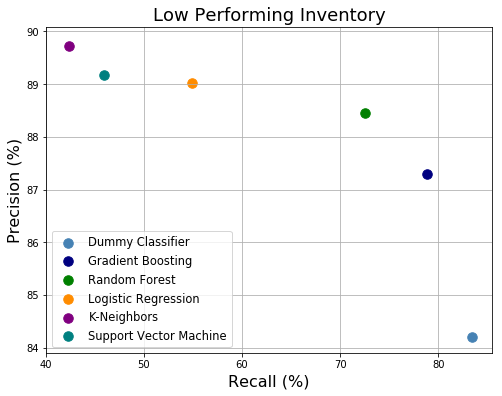

In [5]:
# Low Performing

ml = OrderedDict()

ml['Dummy Classifier']       = [0.84196547*100, 0.83421053*100]
ml['Gradient Boosting']      = [0.87303023*100, 0.78884306*100]
ml['Random Forest']          = [0.88455019*100, 0.72500491*100]
ml['Logistic Regression']    = [0.89019844*100, 0.54881163*100]
ml['K-Neighbors']            = [0.89732221*100, 0.42427814*100]
ml['Support Vector Machine'] = [0.89167722*100, 0.45983107*100]


precision_recall = pd.DataFrame(data=list(ml.values()), 
                                index=ml.keys(),
                                columns=['Precision', 'Recall'])

fig, ax = plt.subplots()

colorlist = ['steelblue', 'navy', 'green', 'darkorange', 'purple', 'teal']

for i, l in enumerate(ml):
    precision_recall.iloc[[i]].plot(x='Recall', y='Precision', kind='scatter',
                                    figsize=(8, 6), ax=ax, s=90, label=l,
                                    color=colorlist[i], grid=True
                                   )


plt.title('Low Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)

plt.legend(prop={'size': 11.5})

display(precision_recall)

In the above plot, random forest and gradient boosting decision trees peform the best but we do not care to model the low performing inventory as best we can. It is better to chose a machine learning algorithm the performance better for high and moderate performing inventory.

### Moderate Performing Inventory

,Precision,Recall
Dummy Classifier,7.792208,8.823529
Gradient Boosting,12.318290,23.290598
Random Forest,14.509166,36.324786
Logistic Regression,12.350660,40.811966
K-Neighbors,10.427687,46.367521
Support Vector Machine,11.433255,42.948718


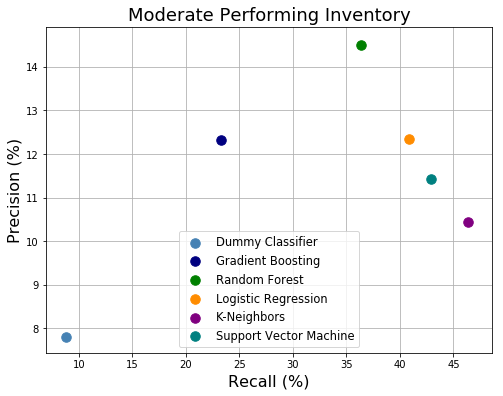

In [6]:
# Moderate Performing

ml = OrderedDict()

ml['Dummy Classifier']       = [0.07792208*100, 0.08823529*100]
ml['Gradient Boosting']      = [0.1231829*100,  0.23290598*100]
ml['Random Forest']          = [0.14509166*100, 0.36324786*100]
ml['Logistic Regression']    = [0.1235066*100,  0.40811966*100]
ml['K-Neighbors']            = [0.10427687*100, 0.46367521*100]
ml['Support Vector Machine'] = [0.11433255*100, 0.42948718*100]


precision_recall = pd.DataFrame(data=list(ml.values()), 
                                index=ml.keys(),
                                columns=['Precision', 'Recall'])

fig, ax = plt.subplots()

colorlist = ['steelblue', 'navy', 'green', 'darkorange', 'purple', 'teal']

for i, l in enumerate(ml):
    precision_recall.iloc[[i]].plot(x='Recall', y='Precision', kind='scatter',
                                    figsize=(8, 6), ax=ax, s=90, label=l,
                                    color=colorlist[i], grid=True
                                   )


plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)

plt.legend(prop={'size': 11.5}, loc=8)

display(precision_recall)

In the above plot, both random forest and logistic regression perform the best for moderately performing inventory. For now these are our best candidates.

### High Performing Inventory

,Precision,Recall
Dummy Classifier,4.697987,4.575163
Gradient Boosting,22.743540,26.114650
Random Forest,23.099078,33.333333
Logistic Regression,17.903869,51.167728
K-Neighbors,15.855865,51.804671
Support Vector Machine,15.914071,54.564756


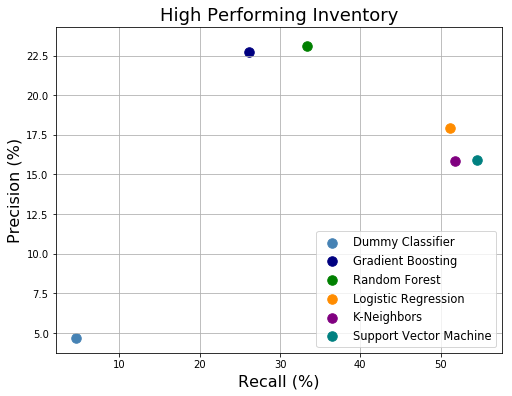

In [7]:
# High Performing

ml = OrderedDict()

ml['Dummy Classifier']       = [0.04697987*100, 0.04575163*100]
ml['Gradient Boosting']      = [0.2274354*100,  0.2611465*100]
ml['Random Forest']          = [0.23099078*100, 0.33333333*100]
ml['Logistic Regression']    = [0.17903869*100, 0.51167728*100]
ml['K-Neighbors']            = [0.15855865*100, 0.51804671*100]
ml['Support Vector Machine'] = [0.15914071*100, 0.54564756*100]


precision_recall = pd.DataFrame(data=list(ml.values()), 
                                index=ml.keys(),
                                columns=['Precision', 'Recall'])

fig, ax = plt.subplots()

colorlist = ['steelblue', 'navy', 'green', 'darkorange', 'purple', 'teal']

for i, l in enumerate(ml):
    precision_recall.iloc[[i]].plot(x='Recall', y='Precision', kind='scatter',
                                    figsize=(8, 6), ax=ax, s=90, label=l,
                                    color=colorlist[i], grid=True
                                   )


plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(prop={'size': 11.5}, loc=4)

display(precision_recall)

In this last plot, we can see that logistic regression out performs random forest. For this reason we select logistic regression as our final model. It has the best recall without sacrificing precision too much.

## Precision vs Recall

It will be beneficial to verify that the models are using the most optimal probability threshold to classify a sample as either a postive sample or negative sample.

### Logistic Regression

In [20]:
# Train model
log.fit(X_train, y_train);

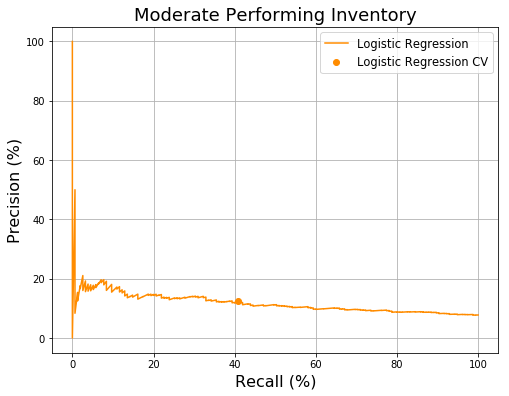

In [24]:
# Moderate Performing

pos_label = 1


precision, recall, thresholds = precision_recall_curve(y_test,
                   log.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='darkorange',
                      grid=True)

# cross-validated score
plt.plot(40.811966, 12.350660, 'o', color='darkorange')

plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Logistic Regression',
            'Logistic Regression CV'],
           prop={'size': 11.5}, loc=1);

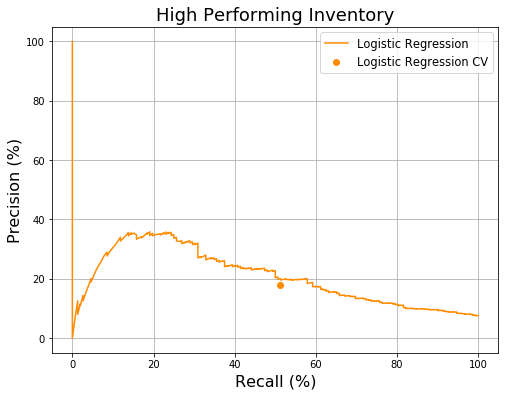

In [23]:
# High Performing

pos_label = 2

precision, recall, thresholds = precision_recall_curve(y_test,
                   log.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='darkorange',
                      grid=True)

# cross-validated score
plt.plot(51.167728, 17.903869, 'o', color='darkorange')

plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Logistic Regression',
            'Logistic Regression CV'],
           prop={'size': 11.5}, loc=1);

Our cross-validated precision and recall values appear as dots on the figure. We can see that the probabilty thresholds chosen by the algorithm are quite good and do not need to be modified. We must keep in mind that the curves themselves are not cross-validated so they will have statistical fluctations making the cross-validated points not lie completely on the curve.

### Gradient Boosting Classifier

In [25]:
# Train model
gbc.fit(X_train, y_train);

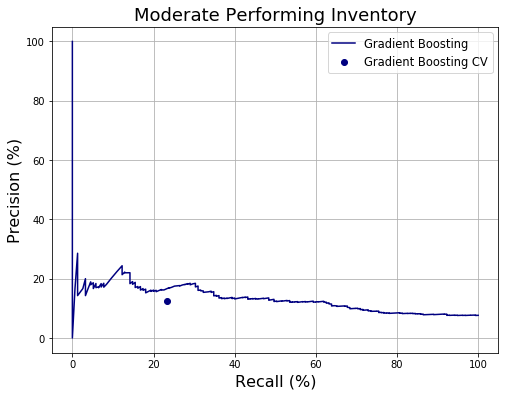

In [26]:
# Moderate Performing

pos_label = 1

precision, recall, thresholds = precision_recall_curve(y_test,
                   gbc.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='navy',
                      grid=True)

# cross-validated score
plt.plot(23.290598, 12.318290, 'o', color='navy')

plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Gradient Boosting',
            'Gradient Boosting CV'],
           prop={'size': 11.5}, loc=1);

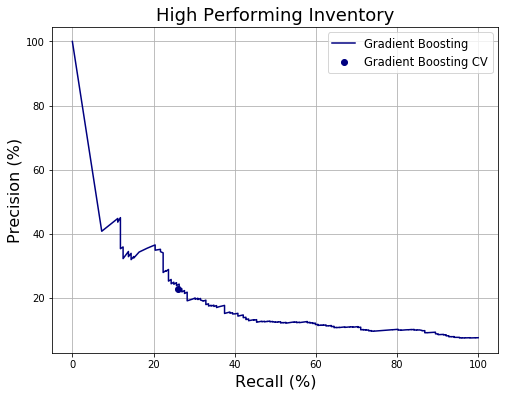

In [27]:
# High Performing

pos_label = 2

precision, recall, thresholds = precision_recall_curve(y_test,
                   gbc.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='navy',
                      grid=True)

# cross-validated score
plt.plot(26.114650, 22.743540, 'o', color='navy')

plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Gradient Boosting',
            'Gradient Boosting CV'],
           prop={'size': 11.5}, loc=1);

### Random Forrest Classifier

In [ ]:
# Train model
rfc.fit(X_train, y_train);

In [ ]:
# Moderate Performing

pos_label = 1

precision, recall, thresholds = precision_recall_curve(y_test,
                   rfc.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='green',
                      grid=True)

# cross-validated score
plt.plot(36.324786, 14.509166, 'o', color='green')

plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Random Forest',
            'Random Forest CV'],
           prop={'size': 11.5}, loc=1);

In [ ]:
# High Performing

pos_label = 2

precision, recall, thresholds = precision_recall_curve(y_test,
                   rfc.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='green',
                      grid=True)

# cross-validated score
plt.plot(33.333333, 23.099078, 'o', color='green')

plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Random Forest',
            'Random Forest CV'],
           prop={'size': 11.5}, loc=1);

### K-Neighbors Classifier

In [ ]:
# Train model
knn.fit(X_train, y_train);

In [ ]:
# Moderate Performing

pos_label = 1

precision, recall, thresholds = precision_recall_curve(y_test,
                   knn.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='purple',
                      grid=True)

# cross-validated score
plt.plot(46.367521, 10.427687, 'o', color='purple')

plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['KNeighbors',
            'KNeighbors CV'],
           prop={'size': 11.5}, loc=1);

In [ ]:
# High Performing

pos_label = 2

precision, recall, thresholds = precision_recall_curve(y_test,
                   knn.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='purple',
                      grid=True)

# cross-validated score
plt.plot(51.804671, 15.855865, 'o', color='purple')

plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['KNeighbors',
            'KNeighbors CV'],
           prop={'size': 11.5}, loc=1);

### Support Vector Machine Classifier

In [ ]:
# Train model
svm.fit(X_train, y_train);

In [ ]:
# Moderate Performing

pos_label = 1

precision, recall, thresholds = precision_recall_curve(y_test,
                   svm.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='teal',
                      grid=True)

# cross-validated score
plt.plot(42.948718, 11.433255, 'o', color='teal')

plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Support Vector Machine',
            'Support Vector Machine CV'],
           prop={'size': 11.5}, loc=1);

In [ ]:
# High Performing

pos_label = 2

precision, recall, thresholds = precision_recall_curve(y_test,
                   svm.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='teal',
                      grid=True)

# cross-validated score
plt.plot(54.564756, 15.914071, 'o', color='teal')

plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Support Vector Machine',
            'Support Vector Machine CV'],
           prop={'size': 11.5}, loc=1);

## Learning Curves

In [ ]:
# Learning curve title
title = "Learning Curves (Logistic Regression)"

# Load model
log = joblib.load('models/LogisticRegression.pkl')

## Random Over Sampling of minority class
ros = RandomOverSampler(ratio='all', random_state=1)

# Pipeline
pipe = make_pipeline(ros, scaler, log)

plot_learning_curve(pipe, title, X, y, ylim=(-0.20, -1.30), 
                    cv=None, scoring='neg_log_loss', n_jobs=-1)

## Feature Importance

In [ ]:
# Load model
log = joblib.load('models/LogisticRegression.pkl')

log_coeff = pd.DataFrame(data=log.best_estimator_._final_estimator.coef_,
                         index=[0, 1, 2], columns=X.columns)

In [ ]:
top_n = 5

pos_class = 1
reference_class = 0

pos_class_log = log_coeff.iloc[[pos_class]]

reference_class_log = log_coeff.iloc[[reference_class]]\
                                .rename(index={reference_class: pos_class})

k_class_log = (pos_class_log - reference_class_log)\
              .sort_values(by=[pos_class], axis=1,
                           ascending=False).transpose()

k_class = k_class_log.rename({'brand_fausto puglisi': 'fausto puglisi',
                              'brand_zimmermann': 'zimmermann',
                              'brand_naven': 'naven',
                              'brand_igigi': 'igigi', 
                              'rent_per_week': 'rental price'})

ax = k_class.head(top_n).plot(kind='barh')

plt.title('Feature Importance (Moderate)', fontsize=16)

plt.xlabel('Logarithmic Loss Coefficients', fontsize=14)

plt.gca().invert_yaxis()

rng = [float(x)/100 for x in range(0, 30, 5)]

ax.set_xticklabels(rng, rotation=0, fontsize=13)
ax.set_yticklabels(k_class.index, rotation=0, fontsize=13)

ax.legend_.remove()

display(k_class.head(top_n))

display(k_class.loc[['size', 'rental price'], :])

In [ ]:
top_n = 5

pos_class = 2
reference_class = 0

pos_class_log = log_coeff.iloc[[pos_class]]

reference_class_log = log_coeff.iloc[[reference_class]]\
                               .rename(index={reference_class: pos_class})

k_class_log = (pos_class_log - reference_class_log)\
              .sort_values(by=[pos_class], axis=1,
                           ascending=False).transpose()

k_class = k_class_log.rename({'brand_for love & lemons': 'for love & lemons',
                              'brand_self-portrait': 'self-portrait',
                              'brand_zimmermann': 'zimmermann',
                              'brand_coach': 'coach', 
                              'rent_per_week': 'rental price'})

ax = k_class.head(top_n).plot(kind='barh')

plt.title('Feature Importance (Moderate)', fontsize=16)

plt.xlabel('Logarithmic Loss Coefficients', fontsize=14)

plt.gca().invert_yaxis()

rng = [float(x)/100 for x in range(0, 30, 5)]

ax.set_xticklabels(rng, rotation=0, fontsize=13)
ax.set_yticklabels(k_class.index, rotation=0, fontsize=13)

ax.legend_.remove()

display(k_class.head(top_n))

display(k_class.loc[['size', 'rental price'], :])

In [ ]:
top_n = 5

pos_class = 2
reference_class = 1

pos_class_log = log_coeff.iloc[[pos_class]]

reference_class_log = log_coeff.iloc[[reference_class]]\
                               .rename(index={reference_class: pos_class})

k_class_log = (pos_class_log - reference_class_log)\
              .sort_values(by=[pos_class], axis=1,
                           ascending=False).transpose()

k_class = k_class_log.rename({'brand_self-portrait': 'self-portrait',
                              'brand_for love & lemons': 'for love & lemons',
                              'brand_lovers + friends': 'lovers + friends',
                              'brand_katya lee': 'katya lee', 
                              'brand_jill stuart': 'jill stuart',
                              'rent_per_week': 'rental price'})

ax = k_class.head(top_n).plot(kind='barh')

plt.title('Feature Importance (Moderate)', fontsize=16)

plt.xlabel('Logarithmic Loss Coefficients', fontsize=14)

plt.gca().invert_yaxis()

rng = [float(x)/100 for x in range(0, 30, 5)]

ax.set_xticklabels(rng, rotation=0, fontsize=13)
ax.set_yticklabels(k_class.index, rotation=0, fontsize=13)

ax.legend_.remove()

display(k_class.head(top_n))

display(k_class.loc[['size', 'rental price'], :])

## Log Loss

In [ ]:
ml = OrderedDict()

ml['Dummy Classifier']       = 9.45090896378153
ml['Gradient Boosting']      = 0.7208726039328565
ml['Random Forest']          = 0.8380180430141219
ml['Logistic Regression']    = 1.062011157653542
ml['KNeighbors']             = 2.3032902858403044
ml['Support Vector Machine'] = 1.007301550578533


logloss = pd.DataFrame(data=list(ml.values()), index=ml.keys(), 
                       columns=['log loss'])

ax = logloss.plot(kind='barh', figsize=(8, 6), grid=True)

plt.title('Logarithmic Loss', fontsize=18)

plt.xlabel('Log Loss', fontsize=16)

ax.set_xticklabels(list(range(0, 12, 2)), rotation=0, fontsize=12)
ax.set_yticklabels(ml.keys(), rotation=0, fontsize=12)

ax.legend_.remove()

display(logloss)